## Project: Build a Traffic Sign Recognition Classifier

Download dataset from this link : https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip

They're pickled files and images are resized to 32*32. 

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_valid.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_test))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

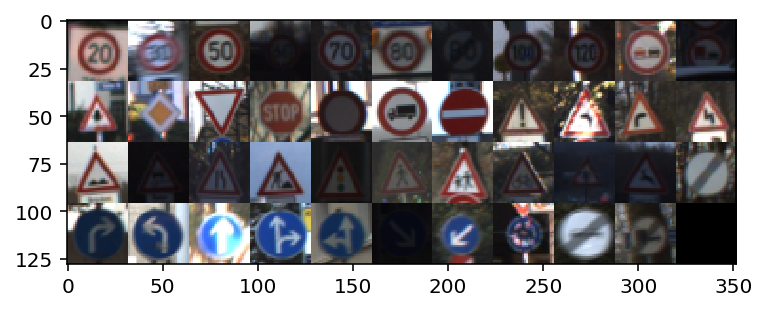

In [4]:
#randomly pick one image from each class and display them as an array
img_array = np.zeros([4*32, 11*32, 3], dtype=np.uint8)

for ii in range(n_classes):
    all_cases = np.where(y_train==ii)
    img_array[32*(ii//11):32*(ii//11+1), 32*(ii%11):32*((ii%11)+1),:] = X_train[all_cases[0][np.random.randint(all_cases[0].shape[0])]]
    
plt.imshow(img_array)

<Container object of 43 artists>

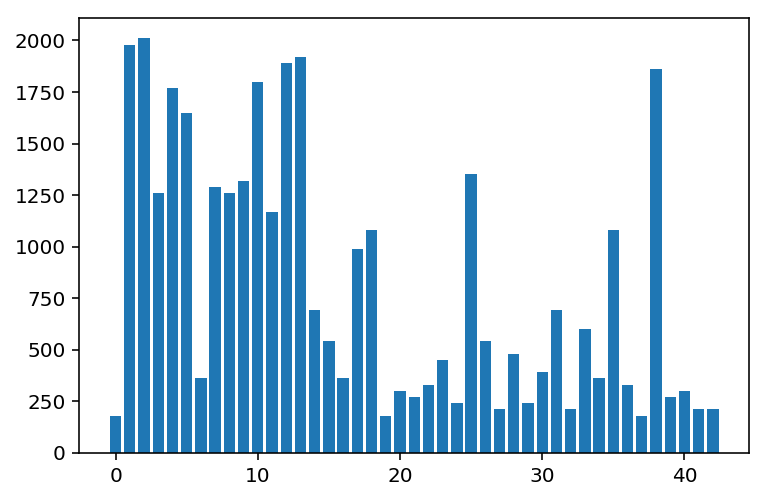

In [5]:
# Plot class distribution
class_distrib = np.zeros([n_classes], dtype=np.int32)
for ii in range(n_classes):
    class_distrib[ii] = np.sum(y_train==ii)
plt.bar(range(n_classes), class_distrib)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
def normalize(x):
    """
    normalize a batch of image to zero mean and unit standard deviation
    """
    batch_mean = np.mean(x)
    batch_std = np.std(x)
    x = x.astype(np.float32)
    for ii in range(x.shape[0]):
        x[ii,:,:,:] = (x[ii,:,:,:] - batch_mean) / batch_std
    return x

In [7]:
def one_hot_encode(x):
    smooth_factor = 0.1
    output = np.zeros([len(x), n_classes]) + ( smooth_factor / n_classes )
    for idx, item in enumerate(x):
        output[idx, item] = 1 - smooth_factor
    return output

In [8]:
def shuffle(x, y):
    index = np.array(range(x.shape[0]))
    np.random.shuffle(index)
    x = x[index]
    y = y[index]
    return x, y

In [9]:
X_valid = normalize(X_valid)
X_test = normalize(X_test)
y_train = one_hot_encode(y_train)
y_valid = one_hot_encode(y_valid)
y_test = one_hot_encode(y_test)

### Model Architecture

In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

In [11]:
def conv2d(x_tensor, conv_num_outputs, conv_ksize, conv_strides, is_train):
    """
    """
    w = tf.get_variable("w", shape=[conv_ksize[0], conv_ksize[1], x_tensor.get_shape().as_list()[3], conv_num_outputs],
                         initializer=tf.contrib.layers.xavier_initializer())
        
    a = tf.nn.conv2d(x_tensor, w, strides=[1, conv_strides[0], conv_strides[1], 1], padding='SAME', name='a')
    
    z = tf.layers.batch_normalization(a, training=is_train)
        
    return tf.nn.relu(z)

In [12]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    """
    return tf.reshape(x_tensor, [tf.shape(x_tensor)[0], np.prod(x_tensor.get_shape().as_list()[1:])])

In [13]:
def fully_conn(x_tensor, num_outputs, is_train):
    
    fc = tf.reshape(x_tensor, [-1, np.prod(x_tensor.get_shape().as_list()[1:])])
    
    w = tf.get_variable("w", shape=[np.prod(x_tensor.get_shape().as_list()[1:]), num_outputs],
                         initializer=tf.contrib.layers.xavier_initializer())
    
    z = tf.layers.batch_normalization(tf.matmul(fc, w), training=is_train)
    
    return tf.nn.relu(z)

In [14]:
def output(x_tensor, num_outputs):
    w = tf.get_variable("w", shape=[np.prod(x_tensor.get_shape().as_list()[1:]), num_outputs],
                         initializer=tf.contrib.layers.xavier_initializer())
    
    b = tf.Variable(tf.truncated_normal([num_outputs],mean=0.0, stddev=0.1, dtype=tf.float32))
    return tf.add(tf.matmul(x_tensor, w), b)

In [15]:
def conv_net(x, keep_prob_1, keep_prob_2, keep_prob_3, train_flag):
    # Convolution and maxpooling layers
    
    with tf.variable_scope("conv1"):
        conv = conv2d(x, 64, (3, 3), (1, 1), train_flag)
    conv = tf.nn.dropout(conv, keep_prob_1)
    with tf.variable_scope("conv2"):
        conv = conv2d(x, 64, (3, 3), (1, 1), train_flag)
    conv = tf.nn.max_pool(conv, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    conv = tf.nn.dropout(conv, keep_prob_1)
    
    with tf.variable_scope("conv3"):
        conv = conv2d(conv, 128, (3, 3), (1, 1), train_flag)
    conv = tf.nn.dropout(conv, keep_prob_2)
    with tf.variable_scope("conv4"):
        conv = conv2d(conv, 128, (3, 3), (1, 1), train_flag)
    conv = tf.nn.max_pool(conv, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    conv = tf.nn.dropout(conv, keep_prob_2)
    
    with tf.variable_scope("conv5"):
        conv = conv2d(conv, 256, (3, 3), (1, 1), train_flag)
    conv = tf.nn.dropout(conv, keep_prob_3)
    with tf.variable_scope("conv6"):
        conv = conv2d(conv, 256, (3, 3), (1, 1), train_flag)
    conv = tf.nn.max_pool(conv, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    conv = tf.nn.dropout(conv, keep_prob_3)
    
    with tf.variable_scope("conv7"):
        conv = conv2d(conv, 512, (3, 3), (1, 1), train_flag)
    conv = tf.nn.dropout(conv, keep_prob_3)
    with tf.variable_scope("conv8"):
        conv = conv2d(conv, 512, (3, 3), (1, 1), train_flag)
    conv = tf.nn.max_pool(conv, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    conv = tf.nn.dropout(conv, keep_prob_3)
    
    with tf.variable_scope("conv9"):
        conv = conv2d(conv, 512, (1, 1), (1, 1), train_flag)
    conv = tf.nn.dropout(conv, keep_prob_3)
    
    # Flatten Layer
    f = flatten(conv)

    # Fully Connected layers
    with tf.variable_scope("fc1"):
        fc1 = fully_conn(f, 512, train_flag)
        fc1 = tf.nn.dropout(fc1, keep_prob_3)
    with tf.variable_scope("fc2"):
        fc2 = fully_conn(fc1, 256, train_flag)
        fc2 = tf.nn.dropout(fc2, keep_prob_3)
    
    # Output Layer
    with tf.variable_scope("out"):
        o = output(fc2, n_classes)
    
    # TODO: return output
    return o

In [16]:
x = tf.placeholder(tf.float32, [None, X_train.shape[1], X_train.shape[2], X_train.shape[3]], "x")
y = tf.placeholder(tf.float32, [None, n_classes], "y")
keep_prob_1 = tf.placeholder(tf.float32, None, "keep_prob_1")
keep_prob_2 = tf.placeholder(tf.float32, None, "keep_prob_2")
keep_prob_3 = tf.placeholder(tf.float32, None, "keep_prob_3")
train_flag = tf.placeholder(tf.bool, None, "train_flag")

# Model
logits = conv_net(x, keep_prob_1, keep_prob_2, keep_prob_3, train_flag)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
with tf.control_dependencies(update_ops):
    optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

In [17]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    """
    loss = session.run(cost, feed_dict={x: feature_batch, y: label_batch, keep_prob_1: 1., keep_prob_2:1., keep_prob_3:1., train_flag:False})
    valid_acc = session.run(accuracy, feed_dict={x: X_valid, y: y_valid, keep_prob_1: 1., keep_prob_2:1., keep_prob_3:1., train_flag:False})
    print('Loss: {:>4.4f} Validation Accuracy: {:.6f}'.format(loss, valid_acc))

In [18]:
def batch_features_labels(features, labels, batch_size):
    """
    Split features and labels into batches
    """
    for start in range(0, len(features), batch_size):
        end = min(start + batch_size, len(features))
        yield features[start:end], labels[start:end]

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [19]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [20]:
epochs = 120
batch_size = 64
keep_probability_1 = 0.8
keep_probability_2 = 0.65
keep_probability_3 = 0.5

In [21]:
import imgaug as ia
from imgaug import augmenters as iaa

sometimes = lambda aug: iaa.Sometimes(0.5, aug)

save_model_path = './image_classification'

class_distrib_thresh = np.where(class_distrib<500)[0]

seq = iaa.Sequential([sometimes(iaa.Crop(px=2)),
                      sometimes(iaa.CropAndPad(px=2)),
                      sometimes(iaa.Affine(scale={"X":(0.8,1.2), "y":(0.8,1.2)}, 
                                           rotate=(-20,20), shear=(-16,16),
                                           translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
                                           cval=(0,255), mode=ia.ALL)),
                      sometimes(iaa.Multiply((0.8, 1.2), per_channel=0.5)),
                      sometimes(iaa.AdditiveGaussianNoise(loc=0, scale=(0., 0.05*255), per_channel=0.5)),
                      sometimes(iaa.GaussianBlur(sigma=(0., 3.0)))], random_order=True)



print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):  
        counter = 0
        X_train, y_train = shuffle(X_train, y_train)
        for batch_features, batch_labels in batch_features_labels(X_train, y_train, batch_size):
            
            #label_thresh = np.tile(class_distrib_thresh, (batch_labels.shape[0], 1))
            #label = np.where(batch_labels==1)
            #label = label[0]
            #label_rep = np.tile(label, (label_thresh.shape[1], 1)).T
            #res = np.sum(label_rep == label_thresh, axis = 1)
            
            #batch_features[res] = seq2.augment_images(batch_features[res])
            #batch_features[~res] = seq1.augment_images(batch_features[~res])
            
            batch_features = seq.augment_images(batch_features)
            
            batch_features = normalize(batch_features)
            
            sess.run(optimizer, feed_dict={x: batch_features, y: batch_labels, keep_prob_1: keep_probability_1,
                                          keep_prob_2: keep_probability_2, keep_prob_3: keep_probability_3, train_flag: True})
            
            counter += 1
            if counter% 50 == 0:
                print('Epoch {:>2}: '.format(epoch + 1), end='')
                print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1: Loss: 7.0634 Validation Accuracy: 0.068707
Epoch  1: Loss: 3.5287 Validation Accuracy: 0.057143
Epoch  1: Loss: 3.5541 Validation Accuracy: 0.048299
Epoch  1: Loss: 3.4297 Validation Accuracy: 0.071882
Epoch  1: Loss: 3.4620 Validation Accuracy: 0.066213
Epoch  1: Loss: 3.5947 Validation Accuracy: 0.079592
Epoch  1: Loss: 3.3484 Validation Accuracy: 0.083220
Epoch  1: Loss: 3.3225 Validation Accuracy: 0.126984
Epoch  1: Loss: 3.2450 Validation Accuracy: 0.095238
Epoch  1: Loss: 3.3133 Validation Accuracy: 0.108163
Epoch  2: Loss: 3.2490 Validation Accuracy: 0.110431
Epoch  2: Loss: 3.3333 Validation Accuracy: 0.099093
Epoch  2: Loss: 3.3086 Validation Accuracy: 0.090023
Epoch  2: Loss: 3.3051 Validation Accuracy: 0.106803
Epoch  2: Loss: 3.4067 Validation Accuracy: 0.079819
Epoch  2: Loss: 3.1550 Validation Accuracy: 0.087302
Epoch  2: Loss: 3.0907 Validation Accuracy: 0.104989
Epoch  2: Loss: 2.9292 Validation Accuracy: 0.133333
Epoch  2: Loss: 3.0527 Validation 

Epoch 16: Loss: 0.9233 Validation Accuracy: 0.978685
Epoch 16: Loss: 0.7855 Validation Accuracy: 0.978005
Epoch 16: Loss: 0.8659 Validation Accuracy: 0.978685
Epoch 16: Loss: 0.8334 Validation Accuracy: 0.981179
Epoch 16: Loss: 0.9557 Validation Accuracy: 0.979139
Epoch 17: Loss: 0.8806 Validation Accuracy: 0.983900
Epoch 17: Loss: 0.7905 Validation Accuracy: 0.981633
Epoch 17: Loss: 0.8661 Validation Accuracy: 0.977325
Epoch 17: Loss: 0.8990 Validation Accuracy: 0.976191
Epoch 17: Loss: 0.9539 Validation Accuracy: 0.986395
Epoch 17: Loss: 0.7890 Validation Accuracy: 0.970068
Epoch 17: Loss: 0.8952 Validation Accuracy: 0.981633
Epoch 17: Loss: 0.9471 Validation Accuracy: 0.980499
Epoch 17: Loss: 1.0461 Validation Accuracy: 0.976191
Epoch 17: Loss: 0.8906 Validation Accuracy: 0.982086
Epoch 18: Loss: 0.8740 Validation Accuracy: 0.985488
Epoch 18: Loss: 0.7966 Validation Accuracy: 0.985488
Epoch 18: Loss: 0.7805 Validation Accuracy: 0.987302
Epoch 18: Loss: 0.8408 Validation Accuracy: 0.

Epoch 32: Loss: 0.7647 Validation Accuracy: 0.984581
Epoch 32: Loss: 0.9025 Validation Accuracy: 0.983220
Epoch 32: Loss: 0.7516 Validation Accuracy: 0.986395
Epoch 32: Loss: 0.8048 Validation Accuracy: 0.984808
Epoch 32: Loss: 0.8305 Validation Accuracy: 0.987529
Epoch 32: Loss: 0.8367 Validation Accuracy: 0.987302
Epoch 32: Loss: 0.7245 Validation Accuracy: 0.986395
Epoch 32: Loss: 0.8989 Validation Accuracy: 0.982767
Epoch 32: Loss: 0.7998 Validation Accuracy: 0.985034
Epoch 32: Loss: 0.8005 Validation Accuracy: 0.984127
Epoch 33: Loss: 0.7880 Validation Accuracy: 0.987075
Epoch 33: Loss: 0.8009 Validation Accuracy: 0.985261
Epoch 33: Loss: 0.8374 Validation Accuracy: 0.978232
Epoch 33: Loss: 0.7700 Validation Accuracy: 0.983220
Epoch 33: Loss: 0.8310 Validation Accuracy: 0.983220
Epoch 33: Loss: 0.9673 Validation Accuracy: 0.985715
Epoch 33: Loss: 0.7686 Validation Accuracy: 0.985715
Epoch 33: Loss: 0.7690 Validation Accuracy: 0.986395
Epoch 33: Loss: 0.7477 Validation Accuracy: 0.

Epoch 47: Loss: 0.8319 Validation Accuracy: 0.984127
Epoch 47: Loss: 0.8186 Validation Accuracy: 0.983674
Epoch 47: Loss: 0.7486 Validation Accuracy: 0.983900
Epoch 47: Loss: 0.7605 Validation Accuracy: 0.981406
Epoch 47: Loss: 0.7950 Validation Accuracy: 0.986168
Epoch 48: Loss: 0.7271 Validation Accuracy: 0.984354
Epoch 48: Loss: 0.7603 Validation Accuracy: 0.982313
Epoch 48: Loss: 0.7826 Validation Accuracy: 0.982993
Epoch 48: Loss: 1.0096 Validation Accuracy: 0.980953
Epoch 48: Loss: 0.8792 Validation Accuracy: 0.982313
Epoch 48: Loss: 0.7324 Validation Accuracy: 0.985488
Epoch 48: Loss: 0.7626 Validation Accuracy: 0.984354
Epoch 48: Loss: 0.7813 Validation Accuracy: 0.985488
Epoch 48: Loss: 0.8363 Validation Accuracy: 0.989343
Epoch 48: Loss: 0.7883 Validation Accuracy: 0.986168
Epoch 49: Loss: 0.8067 Validation Accuracy: 0.985715
Epoch 49: Loss: 0.7958 Validation Accuracy: 0.981179
Epoch 49: Loss: 0.7223 Validation Accuracy: 0.987982
Epoch 49: Loss: 0.7492 Validation Accuracy: 0.

Epoch 63: Loss: 0.7071 Validation Accuracy: 0.985715
Epoch 63: Loss: 0.7371 Validation Accuracy: 0.983220
Epoch 63: Loss: 0.8113 Validation Accuracy: 0.982540
Epoch 63: Loss: 0.7420 Validation Accuracy: 0.984354
Epoch 63: Loss: 0.8228 Validation Accuracy: 0.982313
Epoch 63: Loss: 0.7430 Validation Accuracy: 0.984354
Epoch 63: Loss: 0.7832 Validation Accuracy: 0.983900
Epoch 63: Loss: 0.8530 Validation Accuracy: 0.985714
Epoch 63: Loss: 0.8304 Validation Accuracy: 0.988662
Epoch 63: Loss: 0.7806 Validation Accuracy: 0.985488
Epoch 64: Loss: 0.8541 Validation Accuracy: 0.985941
Epoch 64: Loss: 0.7643 Validation Accuracy: 0.984354
Epoch 64: Loss: 0.8545 Validation Accuracy: 0.984808
Epoch 64: Loss: 0.8217 Validation Accuracy: 0.982313
Epoch 64: Loss: 0.7732 Validation Accuracy: 0.980726
Epoch 64: Loss: 0.7878 Validation Accuracy: 0.986395
Epoch 64: Loss: 0.7370 Validation Accuracy: 0.982993
Epoch 64: Loss: 0.8450 Validation Accuracy: 0.980726
Epoch 64: Loss: 0.8133 Validation Accuracy: 0.

Epoch 78: Loss: 0.7354 Validation Accuracy: 0.986621
Epoch 78: Loss: 0.7161 Validation Accuracy: 0.988889
Epoch 78: Loss: 0.7302 Validation Accuracy: 0.988662
Epoch 78: Loss: 0.9067 Validation Accuracy: 0.988436
Epoch 78: Loss: 0.9573 Validation Accuracy: 0.987075
Epoch 79: Loss: 0.8099 Validation Accuracy: 0.987755
Epoch 79: Loss: 0.7622 Validation Accuracy: 0.988889
Epoch 79: Loss: 0.7992 Validation Accuracy: 0.988662
Epoch 79: Loss: 0.7701 Validation Accuracy: 0.989343
Epoch 79: Loss: 0.7298 Validation Accuracy: 0.988889
Epoch 79: Loss: 0.7516 Validation Accuracy: 0.987755
Epoch 79: Loss: 0.7694 Validation Accuracy: 0.987302
Epoch 79: Loss: 0.7811 Validation Accuracy: 0.987755
Epoch 79: Loss: 0.8206 Validation Accuracy: 0.987982
Epoch 79: Loss: 0.7909 Validation Accuracy: 0.987075
Epoch 80: Loss: 0.7974 Validation Accuracy: 0.987075
Epoch 80: Loss: 0.7668 Validation Accuracy: 0.988662
Epoch 80: Loss: 0.7391 Validation Accuracy: 0.989116
Epoch 80: Loss: 0.9394 Validation Accuracy: 0.

Epoch 94: Loss: 0.7479 Validation Accuracy: 0.979139
Epoch 94: Loss: 0.7953 Validation Accuracy: 0.987302
Epoch 94: Loss: 0.7454 Validation Accuracy: 0.985488
Epoch 94: Loss: 0.8055 Validation Accuracy: 0.981406
Epoch 94: Loss: 0.9003 Validation Accuracy: 0.987982
Epoch 94: Loss: 0.7813 Validation Accuracy: 0.984807
Epoch 94: Loss: 0.7486 Validation Accuracy: 0.987302
Epoch 94: Loss: 0.7280 Validation Accuracy: 0.988209
Epoch 94: Loss: 0.8471 Validation Accuracy: 0.987302
Epoch 94: Loss: 0.7779 Validation Accuracy: 0.987075
Epoch 95: Loss: 0.8442 Validation Accuracy: 0.988436
Epoch 95: Loss: 0.9032 Validation Accuracy: 0.988436
Epoch 95: Loss: 0.7677 Validation Accuracy: 0.987755
Epoch 95: Loss: 0.7903 Validation Accuracy: 0.986848
Epoch 95: Loss: 0.7905 Validation Accuracy: 0.982086
Epoch 95: Loss: 0.7277 Validation Accuracy: 0.986621
Epoch 95: Loss: 0.7318 Validation Accuracy: 0.986395
Epoch 95: Loss: 0.7426 Validation Accuracy: 0.986848
Epoch 95: Loss: 0.7630 Validation Accuracy: 0.

Epoch 109: Loss: 0.7848 Validation Accuracy: 0.984581
Epoch 109: Loss: 0.9006 Validation Accuracy: 0.985488
Epoch 109: Loss: 0.8020 Validation Accuracy: 0.985488
Epoch 109: Loss: 0.7602 Validation Accuracy: 0.986395
Epoch 109: Loss: 0.7930 Validation Accuracy: 0.984127
Epoch 109: Loss: 0.8190 Validation Accuracy: 0.985715
Epoch 109: Loss: 0.7684 Validation Accuracy: 0.983447
Epoch 110: Loss: 0.8842 Validation Accuracy: 0.984581
Epoch 110: Loss: 0.8215 Validation Accuracy: 0.986622
Epoch 110: Loss: 0.7671 Validation Accuracy: 0.988436
Epoch 110: Loss: 0.8421 Validation Accuracy: 0.985941
Epoch 110: Loss: 0.9140 Validation Accuracy: 0.984807
Epoch 110: Loss: 0.8028 Validation Accuracy: 0.983447
Epoch 110: Loss: 0.7700 Validation Accuracy: 0.981406
Epoch 110: Loss: 0.7778 Validation Accuracy: 0.985261
Epoch 110: Loss: 0.8019 Validation Accuracy: 0.981406
Epoch 110: Loss: 0.8755 Validation Accuracy: 0.984354
Epoch 111: Loss: 0.8959 Validation Accuracy: 0.981633
Epoch 111: Loss: 0.7960 Vali

In [22]:
import random
n_samples = 4
top_n_predictions = 3
def test_model():
    """
    Test the saved model against the test dataset
    """
    
    loaded_graph = tf.Graph()
    
    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_kp1 = loaded_graph.get_tensor_by_name('keep_prob_1:0')
        loaded_kp2 = loaded_graph.get_tensor_by_name('keep_prob_2:0')
        loaded_kp3 = loaded_graph.get_tensor_by_name('keep_prob_3:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        loaded_train_flag = loaded_graph.get_tensor_by_name('train_flag:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for test_feature_batch, test_label_batch in batch_features_labels(X_test, y_test, batch_size):
            test_feature_batch = normalize(test_feature_batch)
            test_batch_acc_total += sess.run(loaded_acc,
                feed_dict={loaded_x: test_feature_batch, loaded_y: test_label_batch, loaded_kp1: 1.0, loaded_kp2:1.0,
                          loaded_kp3:1.0, loaded_train_flag:False})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

test_model()

INFO:tensorflow:Restoring parameters from ./image_classification
Testing Accuracy: 0.9850924015045166



---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [23]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg

In [24]:
def inference(img):
    """
    use the model to run predictio on single image
    """
    loaded_graph = tf.Graph()
    
    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_kp1 = loaded_graph.get_tensor_by_name('keep_prob_1:0')
        loaded_kp2 = loaded_graph.get_tensor_by_name('keep_prob_2:0')
        loaded_kp3 = loaded_graph.get_tensor_by_name('keep_prob_3:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_train_flag = loaded_graph.get_tensor_by_name('train_flag:0')
        
        img = np.expand_dims(img,axis=0)
        img = img.astype(np.float32)
        img = (img-np.mean(img))/np.std(img)
        
        #p = sess.run(loaded_logits, feed_dict={loaded_x: img, loaded_keep_prob:1.0})
        softmax_p = tf.nn.softmax(loaded_logits)
        top_k = tf.nn.top_k(softmax_p, k=5)
        prediction = sess.run(top_k, feed_dict={loaded_x: img, loaded_kp1:1., loaded_kp2:1., loaded_kp3:1., loaded_train_flag:False} )
        
    return prediction

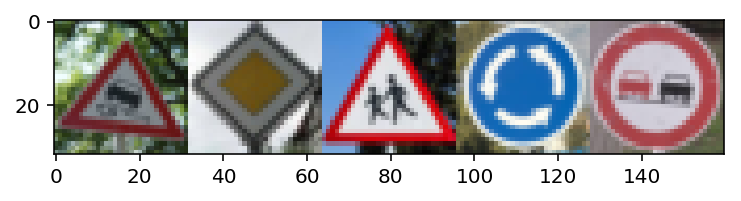

In [25]:
img_array = np.zeros([32, 32*5, 3], dtype=np.uint8)
for ii in range(5):
    img_array[:, 32*ii:32*(ii+1), : ] = mpimg.imread('./traffic_sign_classifier_files/img'+str(ii+1)+'.jpg')
    
plt.imshow(img_array)

### Predict the Sign Type for Each Image

### Analyze Performance

In [26]:
new_image_label = [23, 12, 28, 40, 9]

In [27]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
tf.logging.set_verbosity(tf.logging.ERROR)
prediction = []
for ii in range(1, 6):
    img = mpimg.imread('./traffic_sign_classifier_files/img'+str(ii)+'.jpg')
    prediction.append(inference(img))

In [28]:
correct_count = 0
for i1, i2 in zip(prediction, new_image_label):
    print(i1[1])
    if i1[1][0][0] == i2:
        correct_count += 1

print('accuracy on new images is :{:3.0f} %'.format(correct_count/5*100))

[[23 29 21 42 11]]
[[12 29 39 36 41]]
[[28 30 29 25 24]]
[[40 38  2 33  0]]
[[ 9 21  2 11 25]]
accuracy on new images is :100 %


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [29]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
np.set_printoptions(suppress=True)
for ii in range(len(prediction)):
    print(prediction[ii][0])

[[ 0.98682785  0.00248068  0.00155674  0.00078239  0.00074388]]
[[ 0.97634476  0.0017566   0.00174847  0.00153401  0.0012463 ]]
[[ 0.90411806  0.0162194   0.01569641  0.00618368  0.00546775]]
[[ 0.99231321  0.0022657   0.00064306  0.00050678  0.00037679]]
[[ 0.99285513  0.00068923  0.00049947  0.00042343  0.00039775]]


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [30]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={loaded_x : image_input, loaded_kp1: 1., loaded_kp2:1.,
                                                           loaded_kp3:1., loaded_train_flag:False})
    featuremaps = activation.shape[3]
    if featuremaps > 40:
        featuremaps=40
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

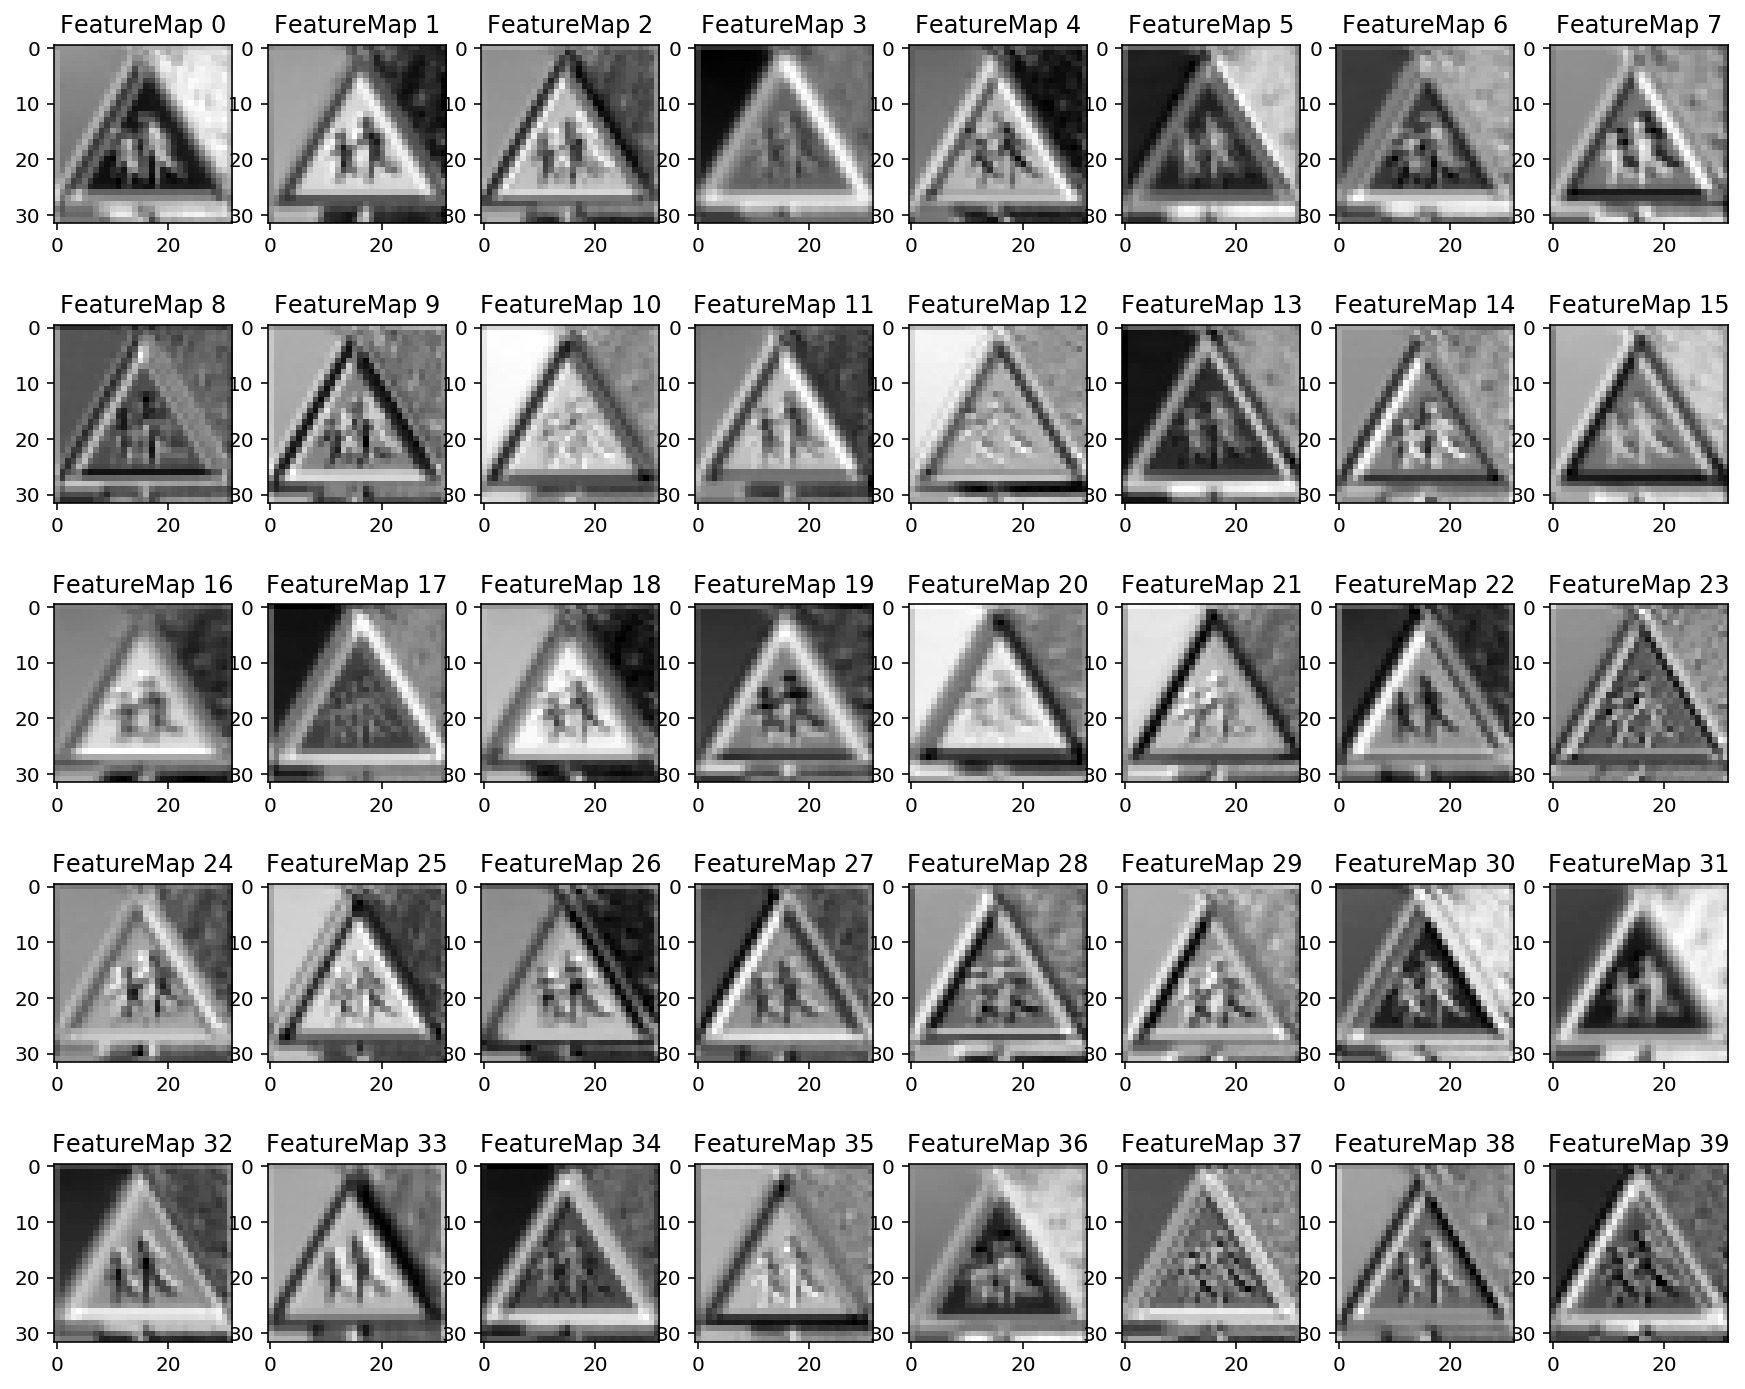

In [33]:
loaded_graph = tf.Graph()
img = mpimg.imread('./traffic_sign_classifier_files/img3.jpg')
with tf.Session(graph=loaded_graph) as sess:
    # Load model
    loader = tf.train.import_meta_graph(save_model_path + '.meta')
    loader.restore(sess, save_model_path)
    
    # Get Tensors from loaded model
    loaded_x = loaded_graph.get_tensor_by_name('x:0')
    loaded_w = loaded_graph.get_tensor_by_name('conv1/a:0')
    loaded_kp1 = loaded_graph.get_tensor_by_name('keep_prob_1:0')
    loaded_kp2 = loaded_graph.get_tensor_by_name('keep_prob_2:0')
    loaded_kp3 = loaded_graph.get_tensor_by_name('keep_prob_3:0')
    loaded_train_flag = loaded_graph.get_tensor_by_name('train_flag:0')
    
    img = np.expand_dims(img,axis=0)
    img = img.astype(np.float32)
    img = (img-np.mean(img))/np.std(img)
    
    outputFeatureMap(img, loaded_w)